# Iris Flower Classification

## Introduction

The Iris flower data set is a multivariate data set, (introduced by the British statistician and biologist Ronald Fisher) which became a typical test case for many statistical classification techniques in machine learning. Consequentially The Iris Dataset is regarded as data science's **Hello World**.

The data set includes 50 samples from each of the three Iris species (Iris Setosa, Iris virginica, and Iris versicolor). From each sample, the length and width of the sepals and petals, both in centimetres, were measured. 

The collection includes 150 records with the following 5 attributes: class, petal length, petal width, sepal length, and sepal width (Species).

For this machine learning project, we will make use of the Support Vector Machine Algorithm.

### 1. Pre-requisites

First, we must import all the required libraries and get a basic overview on the dataset we are currently handling.

***a) Importing the Required Libraries***

In [1]:
#Importing The Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

***b) Loading the Dataset and introductory insights***

* Loading the Dataset

In [2]:
#loading dataset
irisdf=pd.read_csv("/kaggle/input/iriscsv/Iris.csv")
irisdf

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


* Displaying sections of the dataset

In [3]:
#displaying the first 5 values in the data set
irisdf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#displaying the last 5 values in the data set
irisdf.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


* Understanding the Shape of the data

In [5]:
irisdf.shape

(150, 6)

### 2. Statistical Insights

This is done to obtain the statistical information on the dataset. This includes mean, standard deviation, median, maximum value, and minimum value as well as reoccurance of values in the dataset at different percentages.

In [6]:
#Statistical summary of the dataset 
irisdf.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#Info of the dataset
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### 3) Data Cleaning

This is considered the most crucial phase in any Machine Learning project and it involves :-
* deleting duplicate rows and columns
* filling in empty entries with respective data values like mean and median
* dropping irrelevant values 
* removing null entries

***a)Removing duplicates***

***i)Checking for Duplicates***

In [8]:
irisdf.duplicated().sum()

0

Since there are no duplicate values, we move on to check for missing values

***b)Handling Missing Values***

***i)Checking for missing values***

In [9]:
irisdf.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Since there are no columns with missing values, We can move on to dropping any irrelevant values.

***c) Dropping irrelevant values***

We can see that "Id" has no effect on the determination of the length and species of the iris flower and hence, we must remove the column.

To do this, we use the drop function 

In [10]:
irisdf=irisdf.drop("Id",axis=1)


**We have gained the necessary insights and cleaned the dataset. Now we can move on to visualizing and modelling the data**

## 4. Data Visualization

This is done to pictorically represent the data for better and easier understanding. 

To do this,we will use Seaborn and Matplotlib to create a **pair plot** which provides different types of visualizations of the dataset between all parameters and a **pie chart**

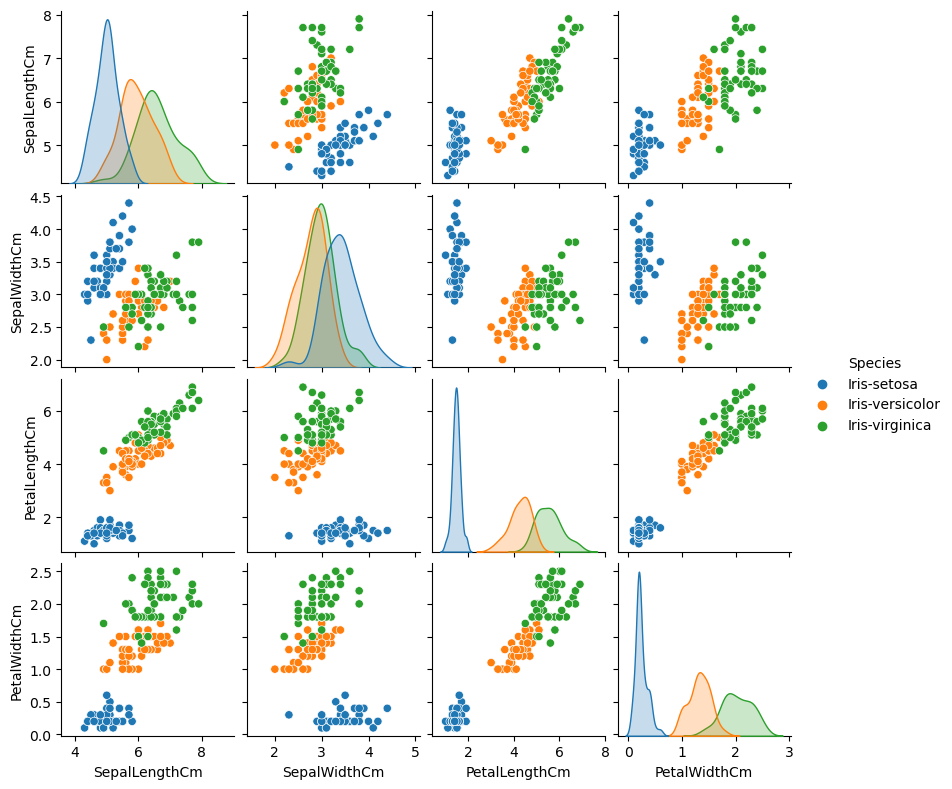

In [11]:
#Pair plot construction 
sns.pairplot(irisdf,hue='Species',height=2)

([<matplotlib.patches.Wedge at 0x747e8f5bccd0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Virginica')])

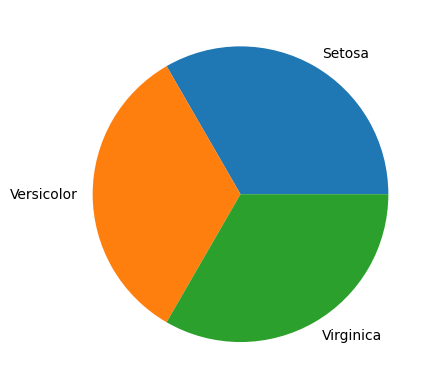

In [12]:
setosa=irisdf[irisdf['Species']=='Iris-setosa']
versicolor=irisdf[irisdf['Species']=='Iris-versicolor']
virginica=irisdf[irisdf['Species']=='Iris-virginica']
plt.pie(irisdf['Species'].value_counts(),labels=['Setosa','Versicolor','Virginica'])

## 5. Data Modelling

This is where we start with machine learning. We use a machine learning algorithm or a model where we train the model based on a subset of the dataset.

For this project, as mentioned previously, we will use Support Vector Machines Algorithm.

***a) Splitting the data***

First, we split the dataset into X(Input attributes) and Y(Target attribute) from which we will get the **train set**(subset used to train the model) and **test set**(subset used to test the trained model)

***i)Defining X and Y***

In [13]:
X=irisdf.iloc[:,:-1]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
Y=irisdf.iloc[:,-1]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

***ii)Defining train and test***

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=81)

***b)Generation of the Model***

To make an SVM model, we first create a ***SVC***(Support Vector Classifier) object by passing argument kernel as a linear kernel in the SVC() function

In [16]:
#Creation of svm Classifier
claf=svm.SVC(kernel='linear')

Then we train the model using the fit function

In [17]:
#Train the model using the training sets
claf.fit(X_train,Y_train)

SVC(kernel='linear')

## 6. Prediction and Testing

The final step is to first, make a prediction from our model and then, test it against our test set to see the accuracy of the model.

(How accurately can the model predict the species of the iris flower from the physical features of the plant)

We can use the accuracy function or a confusion matrix for better understanding of the model.

***i)Definition and prediction done by the model***

In [18]:
#Definition of the prediction
Y_pred = claf.predict(X_test)

In [19]:
X_new = np.array([[3, 2, 1, 0.2], [4.9, 3.1, 3.8, 1.1], [5.3, 2.2, 4.3, 1.9]])
#Prediction of the species
prediction = claf.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


***ii) Confusion matrix***

We make use of the confusion matrix to determine the performance of the classification models for a given set of test data.It shows the errors in the model performance in the form of a matrix, hence also known as an error matrix.

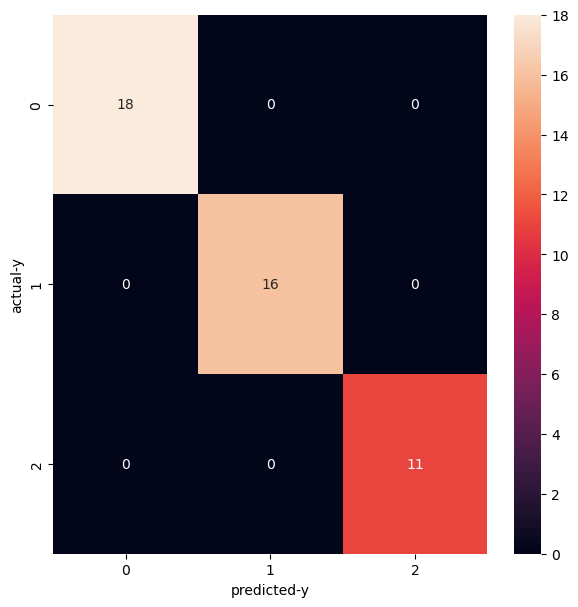

In [20]:
cm=confusion_matrix(Y_pred,Y_test)
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()

***iii)Checking the accuracy of the model***

In [21]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 1.0
